## K-means on Wines dataset

datasource: https://www.kaggle.com/akram24/wine-pca/

author: Elvira Dzhuraeva
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [28]:
df = pd.read_csv('Wine.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [19]:
df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [20]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1db24470>,
      dtype=object)

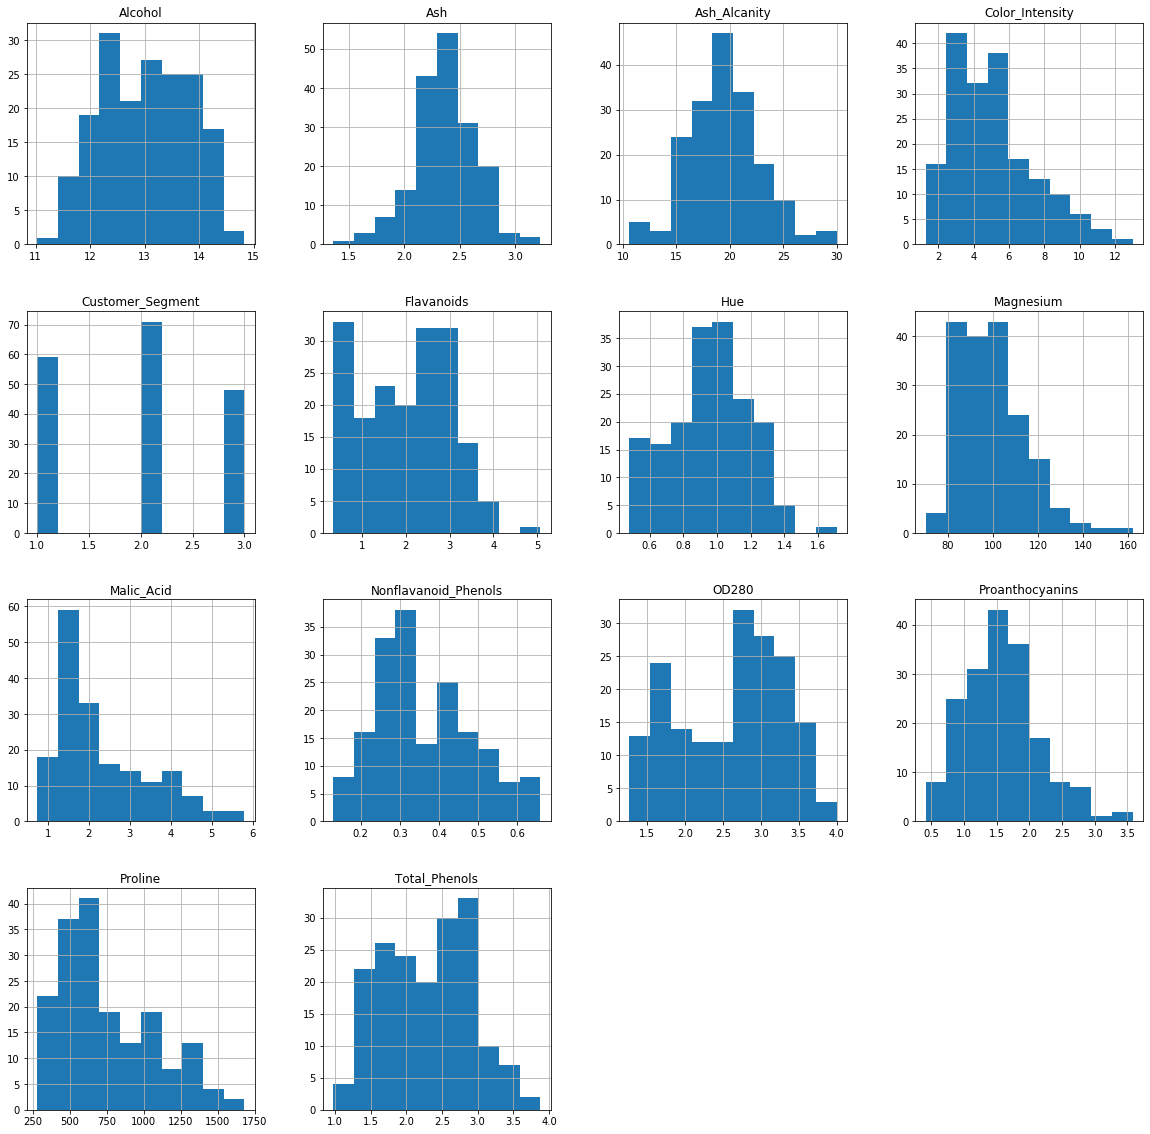

In [21]:
df.hist(figsize=(20,20))

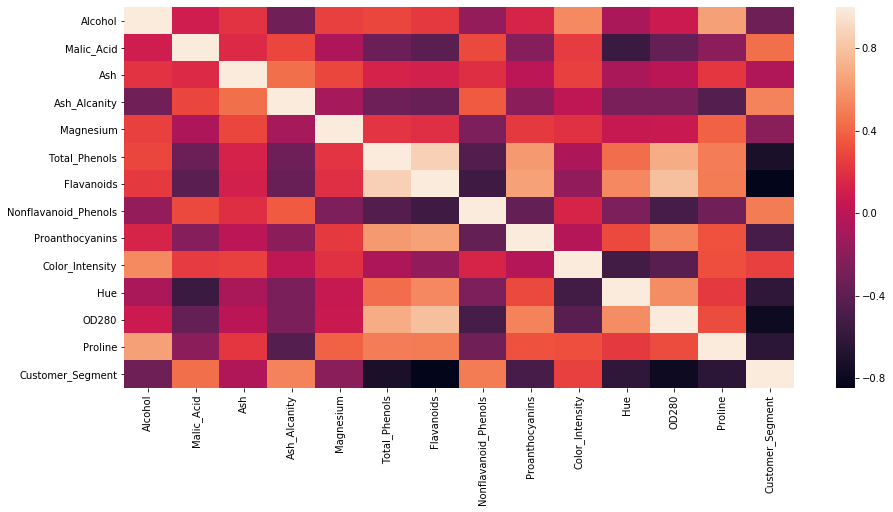

In [23]:
sns.heatmap(df.corr())

In [29]:
Y = df['Customer_Segment']
X = df.drop('Customer_Segment', axis=1)

/Users/edzhurae/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/edzhurae/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


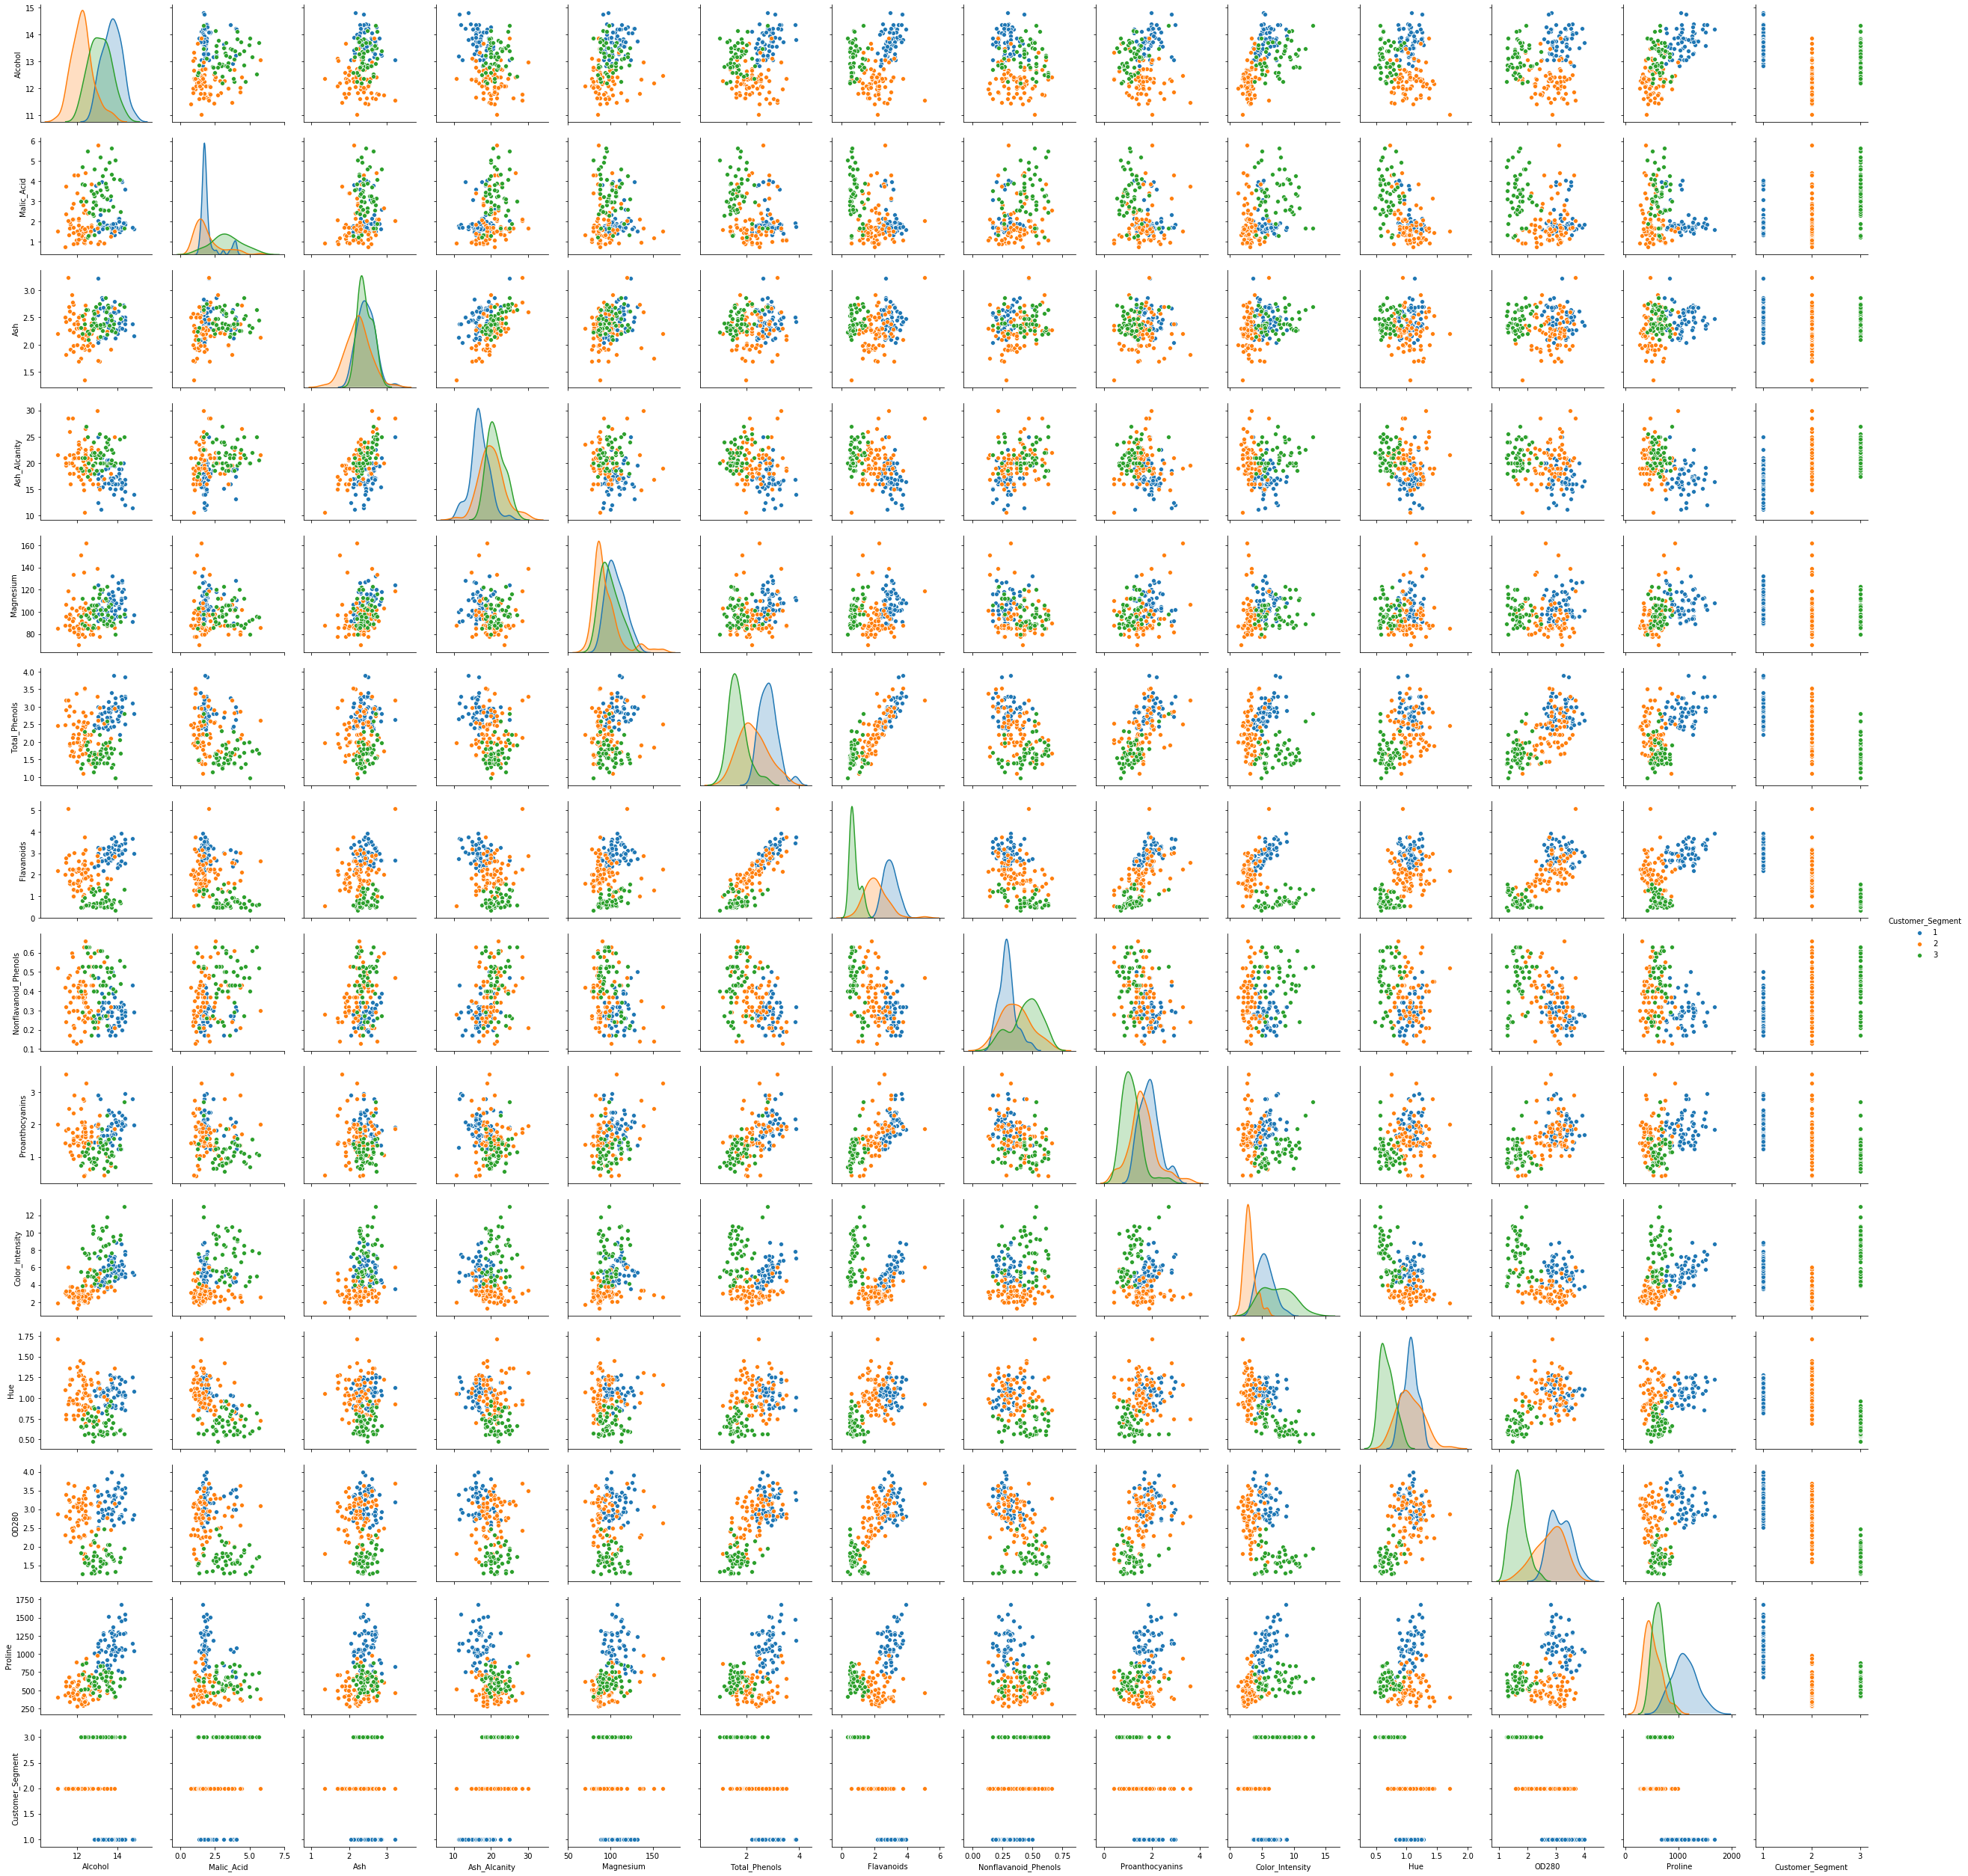

In [30]:
sns.pairplot(df, hue='Customer_Segment')

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [98]:
from sklearn.cluster import KMeans

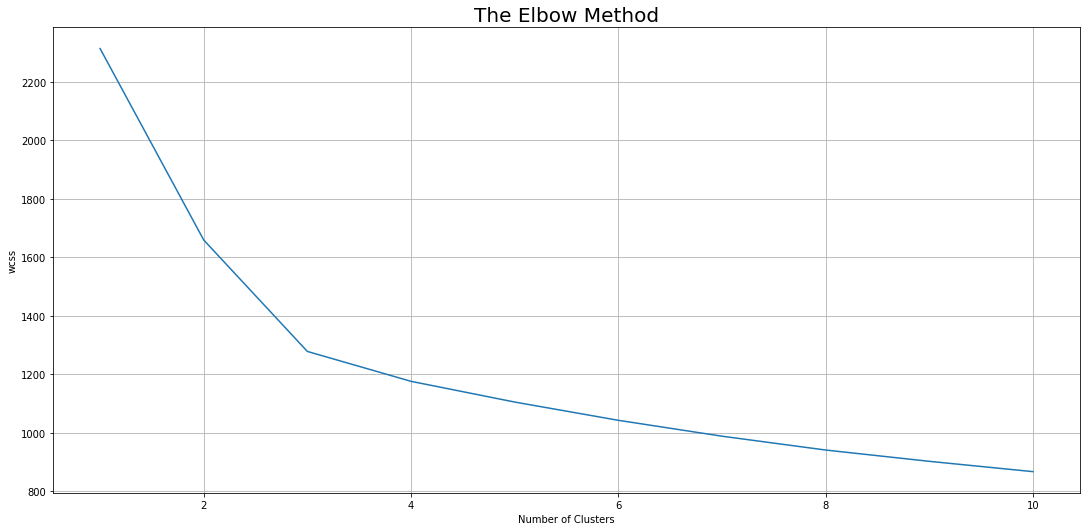

In [106]:

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 42)
    km.fit(X)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

[0.08425912913659277, 0.19430520688376451, 0.11317441596031913, 0.08654068640453119, 0.023754334582417876, -0.08185050644580444, -0.16653007721813087, -0.18148302927413762]


Text(0.5, 1.0, 'The silhouette showing the optimal k')

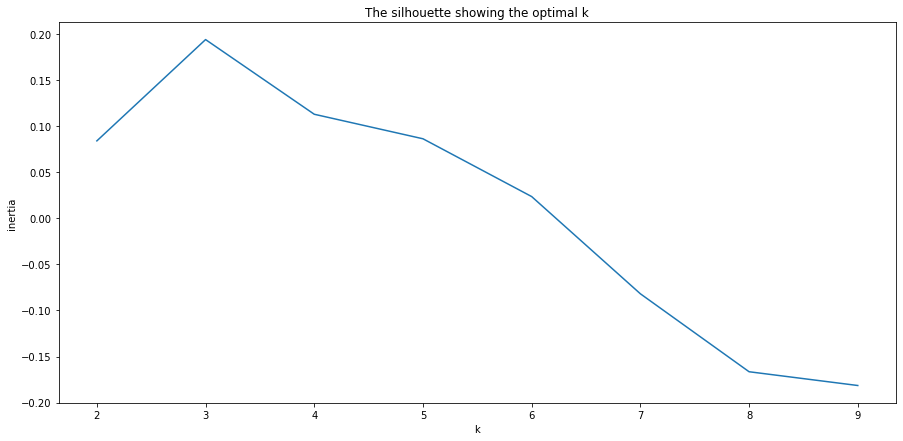

In [119]:
from sklearn.metrics import silhouette_score
inertia = []
k = range(2, 10)
for k_i in k:
    km = KMeans(n_clusters=k_i).fit(X)
    km.fit(X)
    inertia.append(silhouette_score(df, km.labels_))

print(inertia)
    
plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The silhouette showing the optimal k')

In [117]:
from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
tsne_transformed = tsne.fit_transform(X)

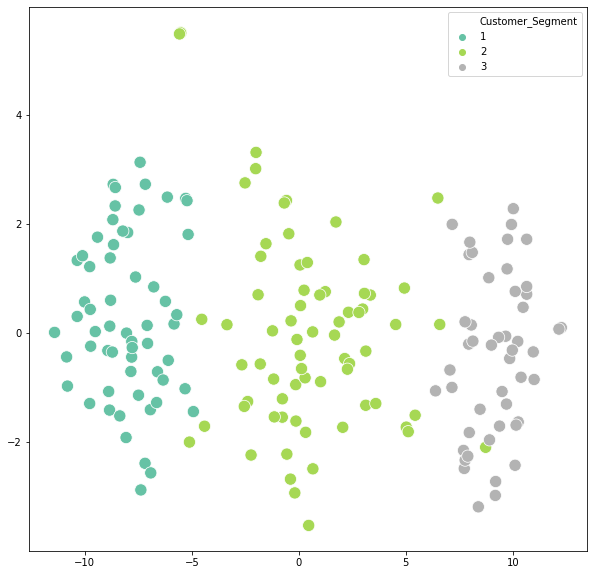

In [118]:
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(
    x=tsne_transformed[:, 0], 
    y=tsne_transformed[:, 1], 
    hue=Y.astype(int),
    s=150,
    palette="Set2",
    legend='full'
);

###  Both methods (elbow and silhouette) divided our dataset in 3 clusters